Exploratory Data Analysis for HIV-1 Protease Binding Affinity Prediction

**Author:** Ali Kawar  
**Date:** December 2025  

This script performs exploratory data analysis on molecular docking data I generated
to understand the relationship between ligand properties and binding affinity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('data.csv', encoding='utf-8-sig')

In [5]:
# DATASET OVERVIEW

print("DATASET OVERVIEW")

print(f"\nShape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nDuplicate rows: {df.duplicated().sum()}")

DATASET OVERVIEW

Shape: (50, 12)
Columns: ['protein', 'ligand_CID', 'HB_L', 'HB_P', 'Hydro', 'SB_L', 'SB_P', 'MW', 'LogP', 'HBD', 'HBA', 'G']

Data types:
protein        object
ligand_CID      int64
HB_L            int64
HB_P            int64
Hydro           int64
SB_L            int64
SB_P            int64
MW            float64
LogP          float64
HBD             int64
HBA             int64
G             float64
dtype: object

Missing values:
protein       0
ligand_CID    0
HB_L          0
HB_P          0
Hydro         0
SB_L          0
SB_P          0
MW            0
LogP          0
HBD           0
HBA           0
G             0
dtype: int64

Duplicate rows: 0


In [7]:
# DROP CID
df = df.drop(columns=['ligand_CID'])

In [8]:
# DESCRIPTIVE STATISTICS
print("DESCRIPTIVE STATISTICS")
print(df.describe())

DESCRIPTIVE STATISTICS
           HB_L       HB_P      Hydro       SB_L       SB_P          MW  \
count  50.00000  50.000000  50.000000  50.000000  50.000000   50.000000   
mean    0.88000   2.180000   7.760000   0.040000   0.360000  431.013000   
std     1.06215   1.560874   3.987532   0.197949   0.851409  183.237244   
min     0.00000   0.000000   0.000000   0.000000   0.000000  112.170000   
25%     0.00000   1.000000   4.250000   0.000000   0.000000  317.845000   
50%     0.50000   2.000000   7.500000   0.000000   0.000000  458.450000   
75%     2.00000   3.000000  10.750000   0.000000   0.000000  536.425000   
max     4.00000   5.000000  17.000000   1.000000   4.000000  929.200000   

            LogP        HBD        HBA          G  
count  50.000000  50.000000  50.000000  50.000000  
mean    3.460000   2.620000   6.140000  -8.077820  
std     1.929682   3.281923   3.534148   2.057367  
min    -0.500000   0.000000   0.000000 -11.830000  
25%     2.150000   1.000000   4.000000  -

In [ ]:
# TARGET VARIABLE ANALYSIS
print("TARGET VARIABLE: Binding Affinity (ΔG)")

print(f"Mean: {df['G'].mean():.3f} kcal/mol")
print(f"Std: {df['G'].std():.3f}")
print(f"Min: {df['G'].min():.3f} kcal/mol")
print(f"Max: {df['G'].max():.3f} kcal/mol")
print(f"Range: {df['G'].max() - df['G'].min():.3f}")

TARGET VARIABLE: Binding Affinity (ΔG)
Mean: -8.078 kcal/mol
Std: 2.057
Min: -11.830 kcal/mol
Max: -3.802 kcal/mol
Range: 8.028


In [11]:
# FEATURES FOR ML MODEL

feature_cols = ['MW', 'LogP', 'HBD', 'HBA']

print("FEATURES FOR ML MODEL (Ligand Properties)")

print(df[feature_cols].describe())

FEATURES FOR ML MODEL (Ligand Properties)
               MW       LogP        HBD        HBA
count   50.000000  50.000000  50.000000  50.000000
mean   431.013000   3.460000   2.620000   6.140000
std    183.237244   1.929682   3.281923   3.534148
min    112.170000  -0.500000   0.000000   0.000000
25%    317.845000   2.150000   1.000000   4.000000
50%    458.450000   3.150000   2.000000   5.000000
75%    536.425000   4.375000   4.000000   8.000000
max    929.200000   8.100000  19.000000  17.000000


In [12]:
# CORRELATION ANALYSIS

print("CORRELATION WITH ΔG (Target)")

correlations = df[feature_cols + ['G']].corr()['G'].drop('G').sort_values(ascending=False)
print(correlations)
print("\nKey Insight: MW shows strongest correlation (-0.868)")
print("Negative correlation = lower ΔG = stronger binding")

CORRELATION WITH ΔG (Target)
HBD    -0.421544
LogP   -0.546930
HBA    -0.566559
MW     -0.868136
Name: G, dtype: float64

Key Insight: MW shows strongest correlation (-0.868)
Negative correlation = lower ΔG = stronger binding


In [13]:
# OUTLIER DETECTION

for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers[col].values}")



MW:
  Range: [112.17, 929.20]
  IQR bounds: [-10.03, 864.30]
  Outliers: 1 (2.0%)
  Outlier values: [929.2]

LogP:
  Range: [-0.50, 8.10]
  IQR bounds: [-1.19, 7.71]
  Outliers: 1 (2.0%)
  Outlier values: [8.1]

HBD:
  Range: [0.00, 19.00]
  IQR bounds: [-3.50, 8.50]
  Outliers: 2 (4.0%)
  Outlier values: [19 13]

HBA:
  Range: [0.00, 17.00]
  IQR bounds: [-2.00, 14.00]
  Outliers: 1 (2.0%)
  Outlier values: [17]


***VISUALIZATION***

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

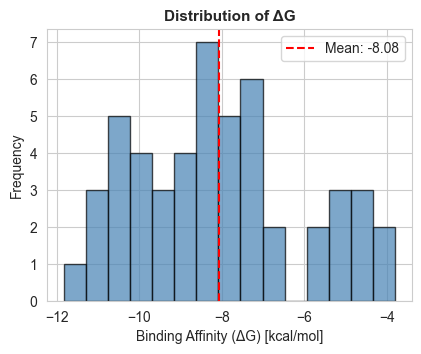

In [15]:
# 1. Distribution of ΔG (target)
ax1 = plt.subplot(3, 3, 1)
plt.hist(df['G'], bins=15, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Binding Affinity (ΔG) [kcal/mol]', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of ΔG', fontsize=11, fontweight='bold')
plt.axvline(df['G'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["G"].mean():.2f}')
plt.legend()

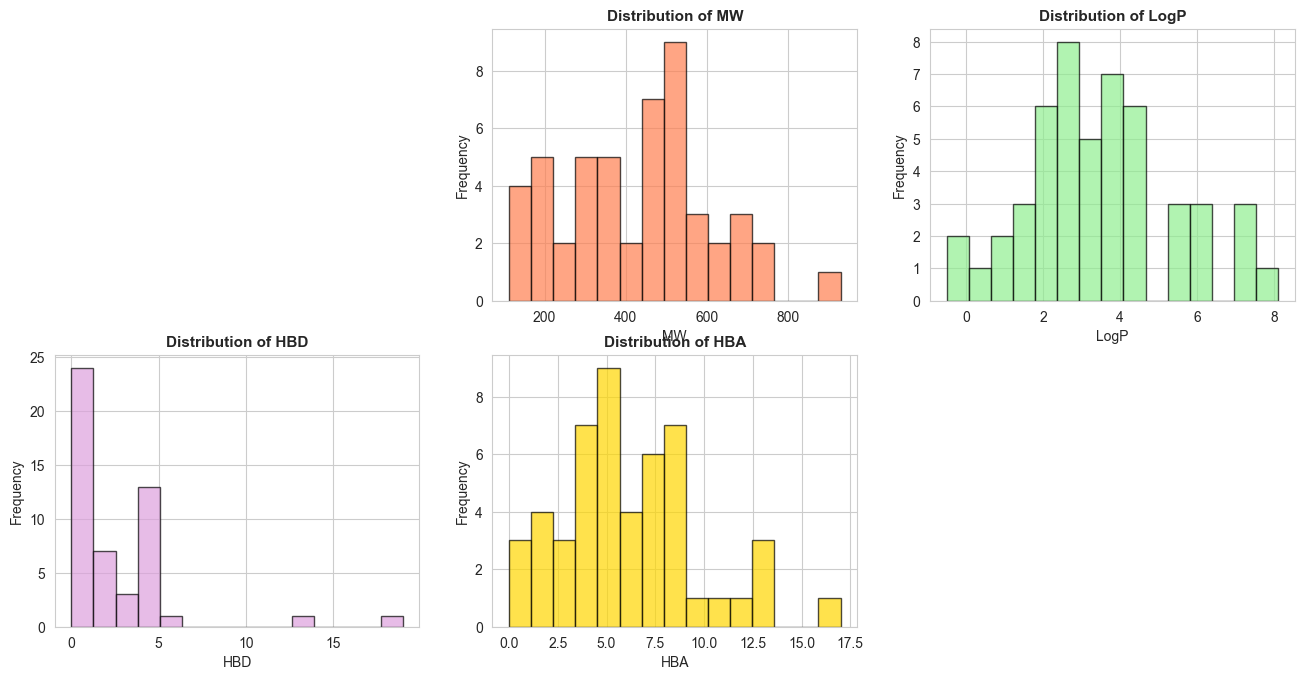

In [16]:
# 2-5. Distribution of features
colors = ['coral', 'lightgreen', 'plum', 'gold']

for idx, (col, color) in enumerate(zip(feature_cols, colors), 2):
    ax = plt.subplot(3, 3, idx)
    plt.hist(df[col], bins=15, edgecolor='black', alpha=0.7, color=color)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Distribution of {col}', fontsize=11, fontweight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

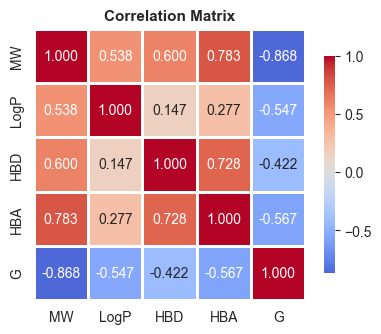

In [17]:
# 6. Correlation heatmap
ax6 = plt.subplot(3, 3, 6)
corr_matrix = df[feature_cols + ['G']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=11, fontweight='bold')

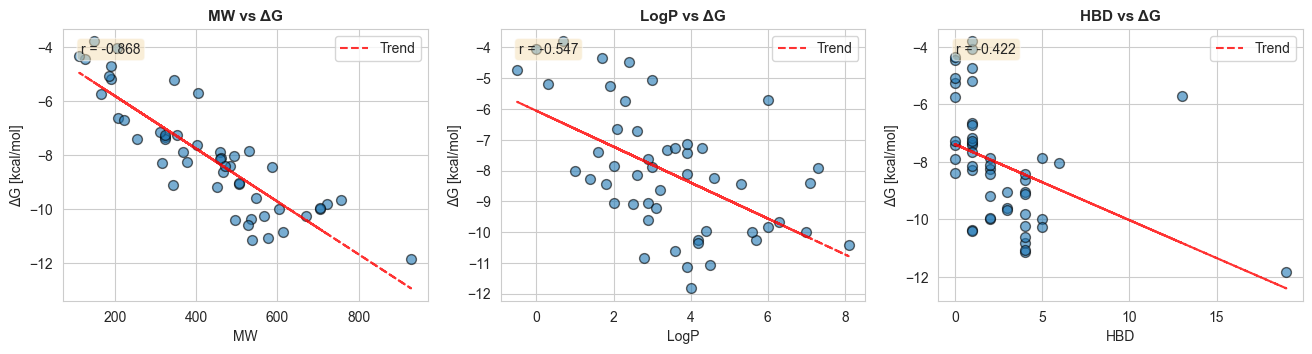

In [18]:
# 7-9. Scatter plots: Features vs ΔG
for idx, col in enumerate(feature_cols[:3], 7):
    ax = plt.subplot(3, 3, idx)
    plt.scatter(df[col], df['G'], alpha=0.6, s=50, edgecolors='black')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('ΔG [kcal/mol]', fontsize=10)
    plt.title(f'{col} vs ΔG', fontsize=11, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(df[col], df['G'], 1)
    p = np.poly1d(z)
    plt.plot(df[col], p(df[col]), "r--", alpha=0.8, label='Trend')
    
    # Add correlation
    corr = df[col].corr(df['G'])
    plt.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
             verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.legend()

In [19]:
plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as: eda_analysis.png")


Visualization saved as: eda_analysis.png


<Figure size 1600x1200 with 0 Axes>

**Key Findings:**

1. Dataset: 50 ligands with complete data
2. Molecular Weight (MW) is the strongest predictor (r = -0.868)
3. All features show negative correlation with ΔG 
4. Minimal outliers (~2-4% per feature)